<a href="https://colab.research.google.com/github/sasi-kalluri/codesoft-tasks/blob/main/movie_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1') # Try reading the file with 'latin-1' encoding. If this doesn't work, try other encodings like 'ISO-8859-1'

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
print(df.columns)

df['Rating'].fillna(df['Rating'].median(), inplace=True)

df.isnull().sum()

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,0
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


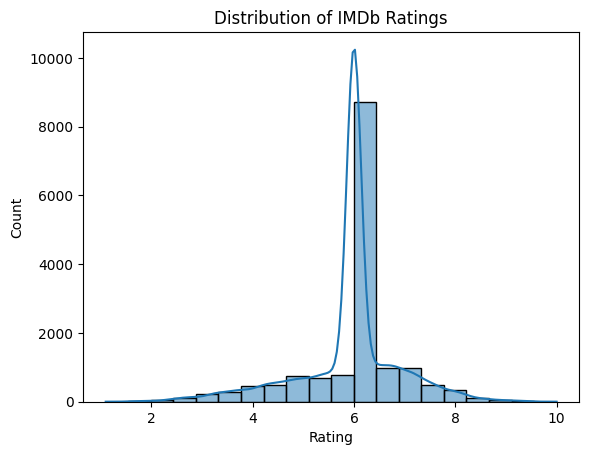

In [ ]:
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['Genre'] = labelencoder.fit_transform(df['Genre'])
df['Director'] = labelencoder.fit_transform(df['Director'])

if 'Actor' in df.columns:
  df['Actor'] = labelencoder.fit_transform(df['Actor'])
else:
  print("Column 'Actor' not found in the DataFrame.")

df.head()

Column 'Actor' not found in the DataFrame.


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,299,6.0,NaN,1926,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,299,7.0,8,1548,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,351,6.0,NaN,5123,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,228,4.4,35,3319,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,299,6.0,NaN,385,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
X = df.drop(columns=['Rating'])
y = df['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (12407, 9)
Testing set shape: (3102, 9)
